# <u>**Video Game Data Exploration**:<u/>

## Introduction:

* This exploration aims to demonstrate patterns with regards to various aspects of video games, including:
  * Sales over time
  * Genre/Game popularity
  * Publisher prolificacy
  * Critic influence
* These metrics are used to demonstrate and increase in video game cultural inudation in modern times
* Graphical representations are used in an impactfull manner to aid in demonstrating this notion

## Step 1:

* Load the necessary packages
* Read and Clean the data
* Briefly explore the data set

In [12]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [18]:
#Read in data set with pandas and assign to df variable
df = pd.read_csv('vgchartz-2024.csv')

#Remove nan or uknown value
df.dropna(inplace=True)

#Remove rows with 0 sales
df = df[(df != 0).all(axis=1)]

#List of columns to filter
drop_col = ['img', 'last_update']

#Drop columns from 'drop_col' list, on column axis 1 and return no copy with 'inplace = True'
df.drop(drop_col, axis=1, inplace=True)

In [19]:
#Explore the data 
df.head()

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06
7,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13.94,5.26,0.21,6.21,2.26,2018-10-26
8,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.4,13.86,8.27,0.07,4.32,1.20,2012-11-13
9,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,8.0,13.80,4.99,0.65,5.88,2.28,2012-11-13


## Step 2: Explore Video Game Sales Over Time

* Convert date columns for uniform calculations by year
* Filter by date and sales exluding null values
* Plot sales over time on a graph

### <u>**Sales Over Time:**<u/>

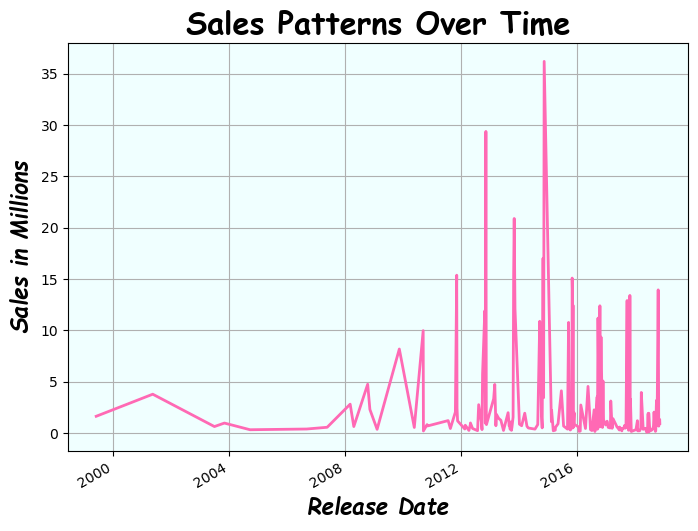

In [44]:
#Convert dates to a uniform format with 'to_datetime' function, errors will be labeled as NaT
df['release_date'] = pd.to_datetime(df['release_date'], errors = 'coerce')

#Filtered variable of release date and sales if not null
df_time_sales = df[df['release_date'].notnull() & df['total_sales'].notnull()]

#Create columns for years and then sum total sales from the grouped rows
sales_patterns = df_time_sales.groupby('release_date')['total_sales'].sum()

#Create figure and configure size
plt.figure(figsize=(8, 6))

#Set graph background color
ax = plt.gca()
ax.set_facecolor('azure')

#Plot the filtered sales patterns
sales_patterns.plot(linewidth=2, color = 'hotpink')

#Assign Graph Labels
plt.title('Sales Patterns Over Time', fontweight = 'bold', fontfamily = 'cursive', size = 22)
plt.xlabel('Release Date', fontweight = 'bold', fontstyle = 'italic', fontfamily = 'cursive', size = 16)
plt.ylabel('Sales in Millions', fontweight = 'bold', fontstyle = 'italic', fontfamily = 'cursive', size = 16)

#Apply a grid and show plot
plt.grid(True)
plt.show()

### <u>**Sales By Region:**<u/>

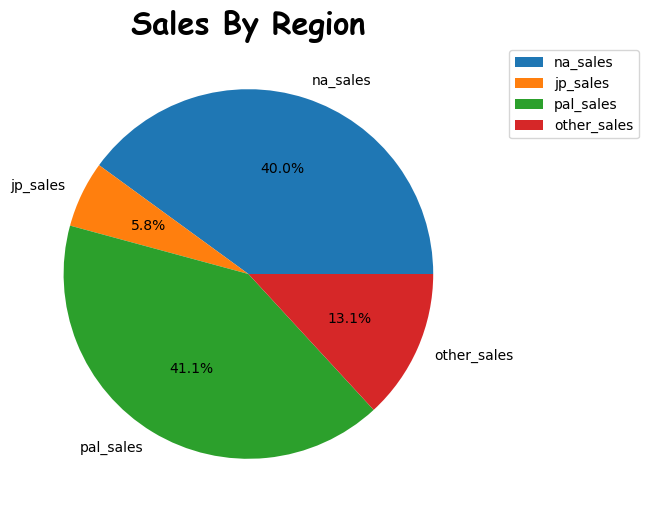

In [37]:
#Variable to capture date with specific regions, while elminating na values
df_regions = df[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].dropna()

#Sum the sales of all regions
total_region_sales = df_regions.sum()

#Pie plot of sales relating to regions
total_region_sales.plot.pie(autopct='%1.1f%%', figsize=(6,6), legend=True)

#Create legend and set location
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#Graph Labels
plt.ylabel('')  # Remove y-axis label to clean up the plot
plt.title('Sales By Region', fontweight = 'bold', fontfamily = 'cursive', size = 22)

#Display Graph
plt.show()

### <u>**Top Ten Best Selling Games:**<u/>

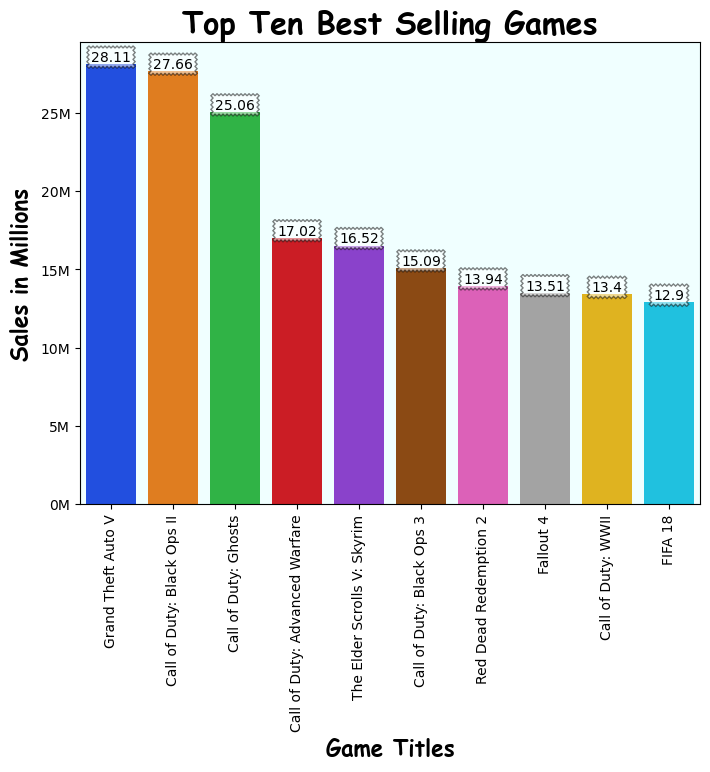

In [45]:
#Sum the values of the top ten games
top_ten_games = df.groupby('title')['total_sales'].sum().sort_values(ascending=False).head(10)

#Create plot figure
plt.figure(figsize=(8,6))

#Set ax labels with seaborn package, data, x/y values, and color palette
ax = sns.barplot(data=df, x=top_ten_games.index, y=top_ten_games.values, palette='bright')

#Add bar labels
ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, color='black', 
             bbox=dict(boxstyle='sawtooth,pad=0.3', facecolor='white', alpha=0.5))

#Set background graph color
ax.set_facecolor('azure')

#Set graph labels
ax.set_title('Top Ten Best Selling Games', fontweight= 'bold', fontfamily = 'cursive', size = 22)
ax.set_xlabel('Game Titles', fontweight = 'bold', fontfamily = 'cursive',size = 16)
ax.set_ylabel('Sales in Millions', fontweight = 'bold', fontfamily = 'cursive', size = 16)

#Change x axis for diplay in millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))

#Rotate x axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()


## Step 3: Explore Genre Prevalence/Popularity:

* Demonstrate prevalence of games with regards to genres
* Find which genres are most popular within each graphical region

### <u>**Games Per Genre:**<u/>

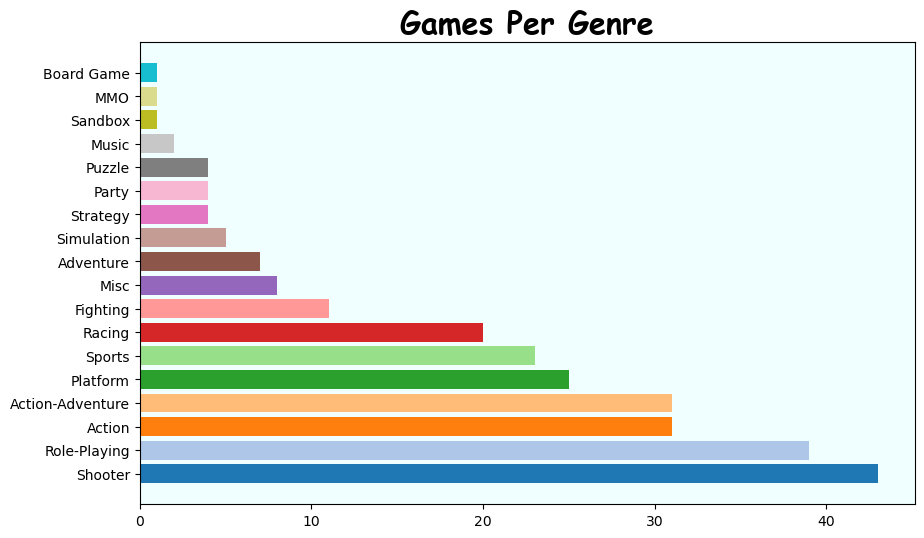

In [51]:
#Filter data set the calculate ammount of games per genre
genres = df['genre'].value_counts()


#Create figure for plotting
plt.figure(figsize=(10, 6))

#Extract the genre title and amounts via 'values' and 'index'
genre_amount = genres.values
genre_title = genres.index

#Create Bars Manually for horizontal plotting and color grading
for i, (title, amount) in enumerate(zip(genre_title, genre_amount)):
    plt.barh(i, amount, color=plt.cm.tab20(i / len(genre_title)))

#Set graph background color
ax = plt.gca()
ax.set_facecolor('azure')

#Set tick values
plt.yticks(ticks=range(len(genre_amount)), labels=genre_title)

#Set graph label
plt.title('Games Per Genre', fontweight = 'bold', fontfamily = 'cursive', size = 22)

#Display Graph
plt.show()

### <u>**Genre Popularity By Region:**<u/>

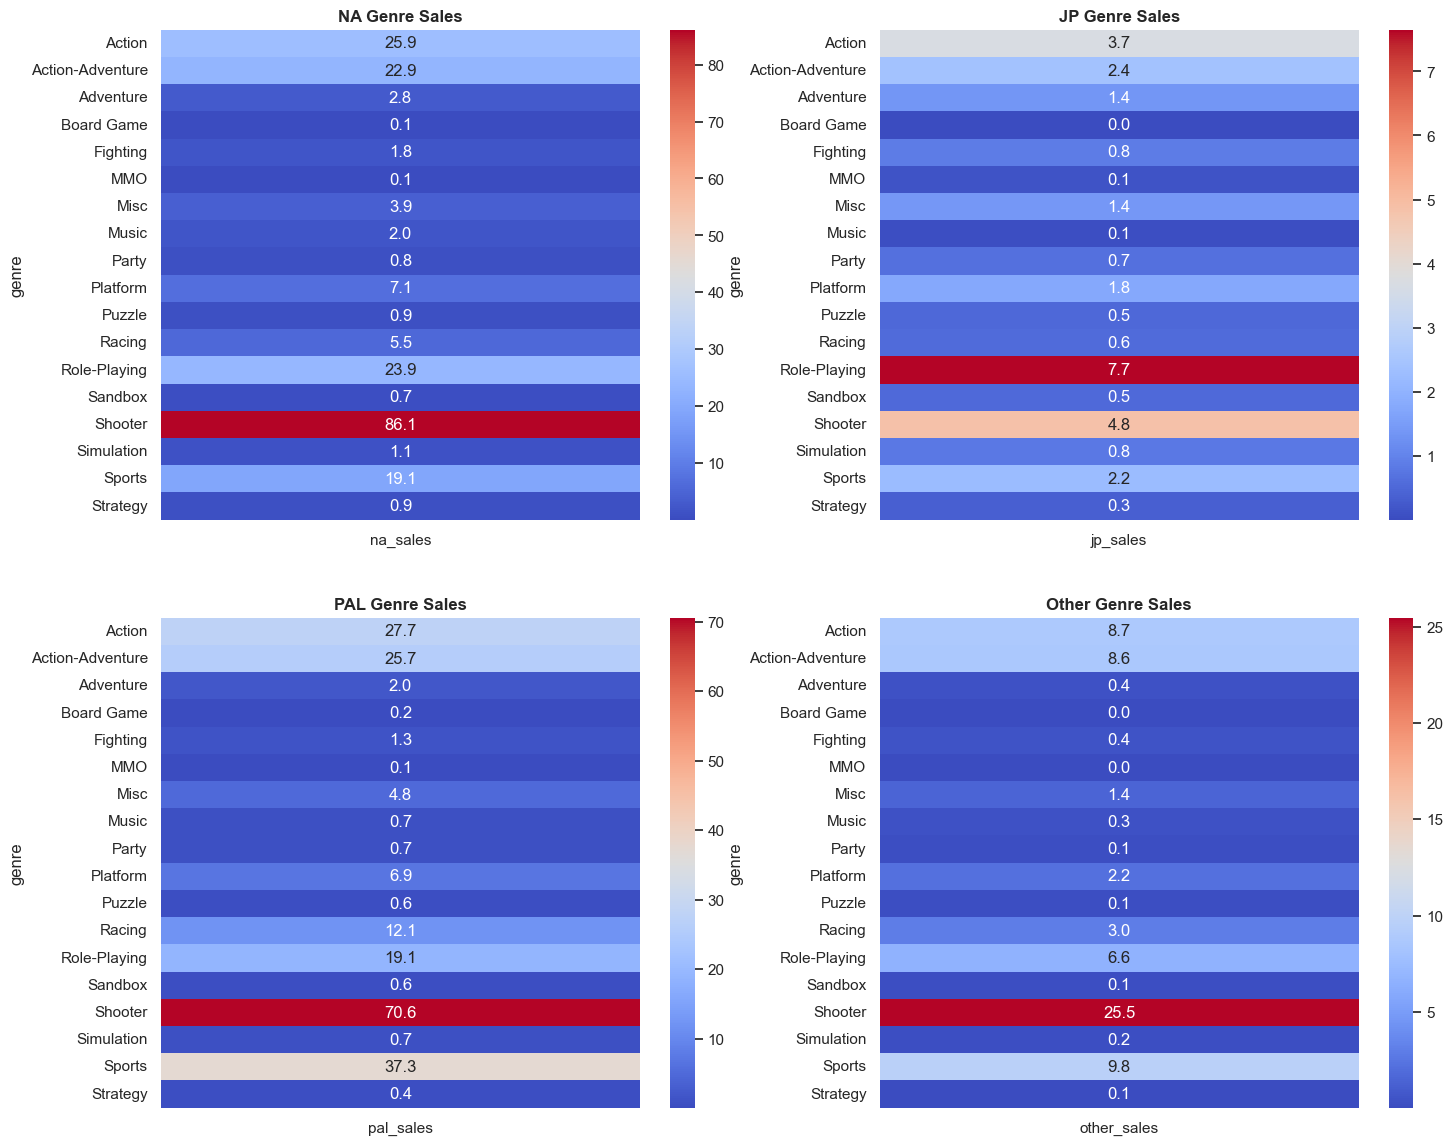

In [18]:
#Grouping and Aggregating data, summing all regions by genres
na_region = df.groupby('genre').agg({
    'na_sales': 'sum'})

jp_region = df.groupby('genre').agg({
    'jp_sales': 'sum'})

pal_region = df.groupby('genre').agg({
    'pal_sales': 'sum'})

other_region = df.groupby('genre').agg({
    'other_sales': 'sum'})


#Figure for plotting
fig, axes = plt.subplots(2,2, figsize=(17,14))

#Createing 4 seprate heat maps 
sns.heatmap(na_region, annot=True, fmt='.1f', cmap = 'coolwarm', ax = axes[0,0])
axes[0,0].set_title('NA Genre Sales', fontweight= 'bold')
#axes[0.0].set_xlabel(':')

sns.heatmap(jp_region, annot=True, fmt='.1f', cmap = 'coolwarm', ax = axes[0,1])
axes[0,1].set_title('JP Genre Sales', fontweight= 'bold')

sns.heatmap(pal_region, annot=True, fmt='.1f', cmap = 'coolwarm', ax = axes[1,0])
axes[1,0].set_title('PAL Genre Sales', fontweight= 'bold')

sns.heatmap(other_region, annot=True, fmt='.1f', cmap = 'coolwarm', ax = axes[1,1])
axes[1,1].set_title('Other Genre Sales', fontweight= 'bold')


#Display graph
plt.show()

## Step 3: Explore Top Ten Most Prolific Publishers

* Create a pie chart to highlight most prolific publishers

### <u>**Top Ten Game Publishers:**<u/>

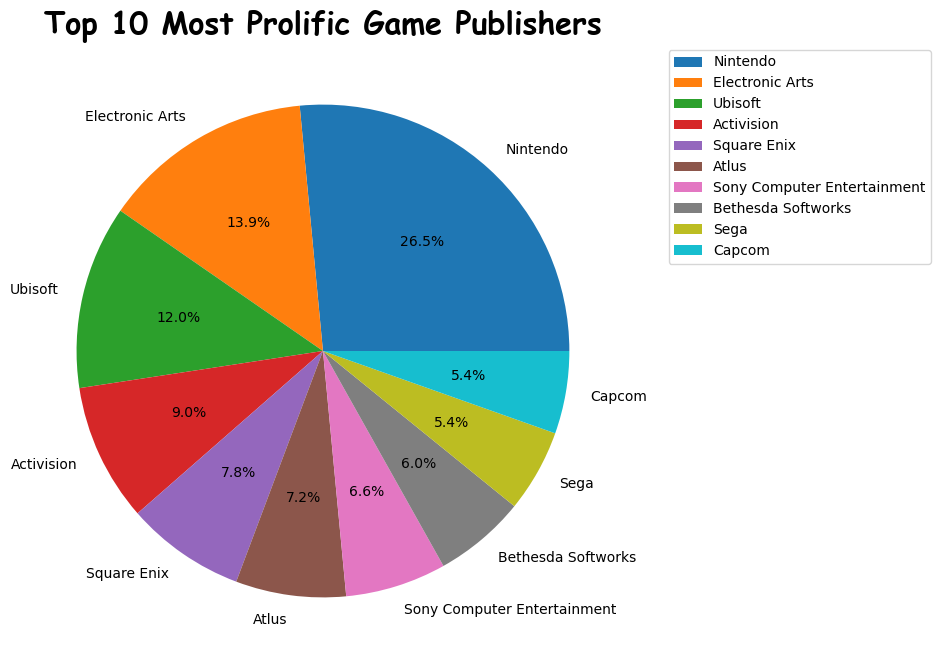

In [8]:
#Calculate data counts via publisher
game_publishers = df['publisher'].value_counts()

#Filter out unknowns, '~' not then select 'column name', 'is.in' then pass it the list
game_publisher_filt = game_publishers[~game_publishers.index.isin(['Unknown'])]


#Pie chart of top 10 publishers
game_publisher_filt.head(10).plot.pie(y='publisher', autopct='%1.1f%%', figsize=(8,8), legend=True)

#Create legend and set location
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#Remove y label for cleaner plotting
plt.ylabel('') 

#Set Title
plt.title('Top 10 Most Prolific Game Publishers', fontweight = 'bold', fontfamily = 'cursive', size = 22)

#Display chart
plt.show()

## Step 4: Influence of Critic Scores On Sales

* Use scatter plot to demonstrate where mean lies in relation to critic scores and total sales
* Explore the critic score distribution pattern

### <u>**Critcs Scores and Sales:**<u/>

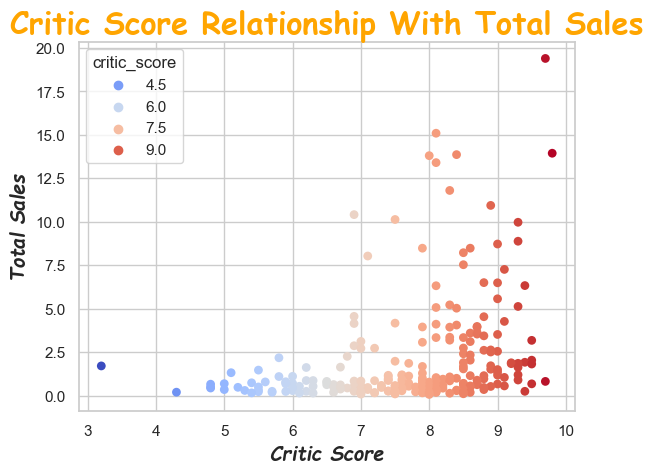

In [56]:
#Set grid theme color
sns.set_theme(style = 'whitegrid')

#Create scatter plot
sns.scatterplot(x= 'critic_score', y='total_sales', hue='critic_score', palette= 'coolwarm', 
                s=40, sizes=(14,8), linewidth = 0, data= df)

#Set graph labels
plt.title('Critic Score Relationship With Total Sales', fontweight = 'bold', fontfamily = 'cursive', color = 'orange',  size = 22)
plt.xlabel('Critic Score', fontweight = 'bold', fontfamily = 'cursive', fontstyle = 'italic', size = 14)
plt.ylabel('Total Sales', fontweight = 'bold', fontfamily = 'cursive', fontstyle = 'italic', size = 14)

#Display plot
plt.show()

### <u>**Distribution Of Critic Scores**:<u/>

C:\Users\dream\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


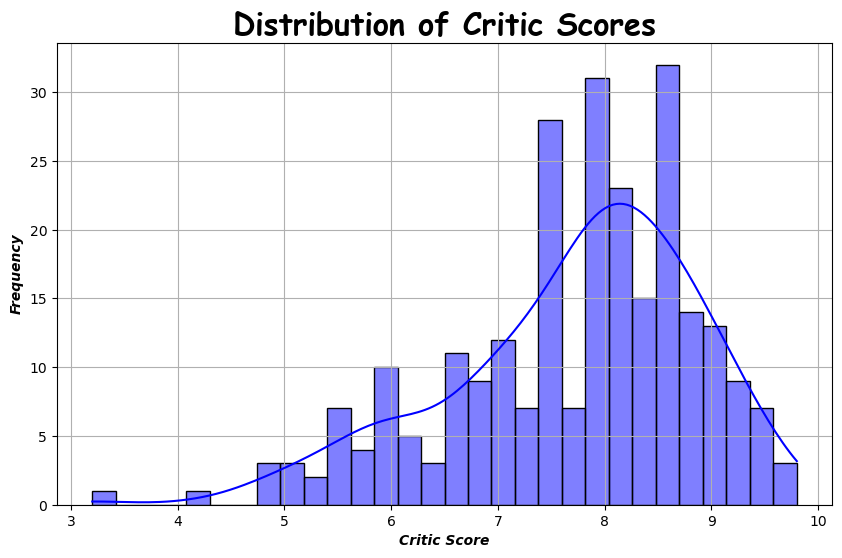

In [15]:
#Create figure for plotting
plt.figure(figsize=(10, 6))

#Histogram plot of critic scores, skipping of na values
sns.histplot(df['critic_score'].dropna(), kde=True, bins=30, color='blue')

#Setting Graph Labels
plt.title('Distribution of Critic Scores', fontweight='bold', fontfamily='cursive', size=22)
plt.xlabel('Critic Score', fontweight = 'bold', fontstyle = 'italic')
plt.ylabel('Frequency', fontweight = 'bold', fontstyle = 'italic')

#Add grid and show plot
plt.grid(True)
plt.show()

# <u>**Conclusion:**<u/>

* It appears as though video games have grown significantly in the past 20 or so years
* The North American and Pal regions seem to dominate the game market
* The most popular games seem to coincide with the most popular/prolific genres of shooter and action
* Nintendo appears to be the most prolific publishing company in the data set
* It seems as through critic score indfluence overall sales, however, this could be skewed due to less and greater data points in various regions

## <u>Dataset Limitations:<u/>

* Limited information about Japanese region sales, significant null value amount
* Sales information primarliy captured data from the 2000's
* Playstation, Xbox varients were the dominant console data values in the set